In [1]:
!wget https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0321EN/data/images/Positive_tensors.zip 

--2025-08-08 21:10:06--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0321EN/data/images/Positive_tensors.zip
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2598656062 (2.4G) [application/zip]
Saving to: ‘Positive_tensors.zip’

Positive_tensors.zi 100%[===================>]   2.42G  11.1MB/s    in 3m 47s  

2025-08-08 21:13:58 (10.9 MB/s) - ‘Positive_tensors.zip’ saved [2598656062/2598656062]



In [2]:
!unzip -qo Positive_tensors.zip 

In [3]:
! wget https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0321EN/data/images/Negative_tensors.zip
!unzip -qo Negative_tensors.zip

--2025-08-08 21:15:37--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0321EN/data/images/Negative_tensors.zip
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2111408108 (2.0G) [application/zip]
Saving to: ‘Negative_tensors.zip’

Negative_tensors.zi 100%[===================>]   1.97G  11.0MB/s    in 3m 5s   

2025-08-08 21:18:48 (10.9 MB/s) - ‘Negative_tensors.zip’ saved [2111408108/2111408108]



### Imports and Auxiliary Functions

In [3]:
!pip install torchvision
!pip install h5py

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 7.4 MB/s  0:00:00 eta 0:00:01


In [4]:
# These are the libraries will be used for this lab.
import torchvision.models as models
from PIL import Image
import pandas
from torchvision import transforms
import torch.nn as nn
import time
import torch 
import matplotlib.pylab as plt
import numpy as np
from torch.utils.data import Dataset, DataLoader
import h5py
import os
import glob
torch.manual_seed(0)

In [5]:
from matplotlib.pyplot import imshow
import matplotlib.pylab as plt
from PIL import Image
import pandas as pd
import os

### Dataset Class


In [8]:
# Create your own dataset object

class Dataset(Dataset):

    # Constructor
    def __init__(self,transform=None,train=True):
        positive="Positive_tensors"
        negative='Negative_tensors'

        positive_file_path=positive
        negative_file_path=negative
        positive_files=[os.path.join(positive_file_path,file) for file in os.listdir(positive_file_path) if file.endswith(".pt")]
        negative_files=[os.path.join(negative_file_path,file) for file in os.listdir(negative_file_path) if file.endswith(".pt")]
        number_of_samples=len(positive_files)+len(negative_files)
        self.all_files=[None]*number_of_samples
        self.all_files[::2]=positive_files
        self.all_files[1::2]=negative_files 
        # The transform is goint to be used on image
        self.transform = transform
        #torch.LongTensor
        self.Y=torch.zeros([number_of_samples]).type(torch.LongTensor)
        self.Y[::2]=1
        self.Y[1::2]=0
        
        if train:
            self.all_files=self.all_files[0:30000]
            self.Y=self.Y[0:30000]
            self.len=len(self.all_files)
        else:
            self.all_files=self.all_files[30000:]
            self.Y=self.Y[30000:]
            self.len=len(self.all_files)     
       
    # Get the length
    def __len__(self):
        return self.len
    
    # Getter
    def __getitem__(self, idx):
               
        image=torch.load(self.all_files[idx])
        y=self.Y[idx]
                  
        # If there is any transform method, apply it onto the image
        if self.transform:
            image = self.transform(image)

        return image, y
    
print("done")

done


In [9]:
train_dataset = Dataset(train=True)
validation_dataset = Dataset(train=False)
print("done")

done


### Load the pre-trained model resnet18

In [ ]:
# Step 1: Load the pre-trained model resnet18
model = models.resnet18(pretrained=True)
# Type your code here

In [11]:
# Step 2: Set the parameter cannot be trained for the pre-trained model
for param in model.parameters():
    param.required_grad = False

# Type your code here

In [28]:
model.fc = nn.Linear(512,2)

In [29]:
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [14]:
# Step 1: Create the loss function
criterion = nn.CrossEntropyLoss()

# Type your code here

In [15]:
train_loader = DataLoader(train_dataset, batch_size=100)
validation_loader = DataLoader(validation_dataset, batch_size=100)

In [16]:
optimizer = torch.optim.Adam([parameters  for parameters in model.parameters() if parameters.requires_grad],lr=0.001)

In [17]:
n_epochs=1
loss_list=[]
accuracy_list=[]
correct=0
N_test=len(validation_dataset)
N_train=len(train_dataset)
start_time = time.time()
#n_epochs

Loss=0
start_time = time.time()
for epoch in range(n_epochs):
    for x, y in train_loader:

        model.train() 
        #clear gradient 
        optimizer.zero_grad()
        #make a prediction 
        z = model(x)
        # calculate loss 
        loss=criterion(z,y)
        # calculate gradients of parameters 
        loss.backward()
        # update parameters 
        optimizer.step()
        loss_list.append(loss.data)
    correct=0
    for x_test, y_test in validation_loader:
        # set model to eval 
        model.eval()
        #make a prediction 
        z = model(x_test)
        #find max 
        _, yhat = torch.max(z.data, 1)
        
        #Calculate misclassified  samples in mini-batch 
        #hint +=(yhat==y_test).sum().item()
        correct +=(yhat==y_test).sum().item()
   
    accuracy=correct/N_test
    accuracy_list.append(accuracy)



In [18]:
accuracy

0.9978

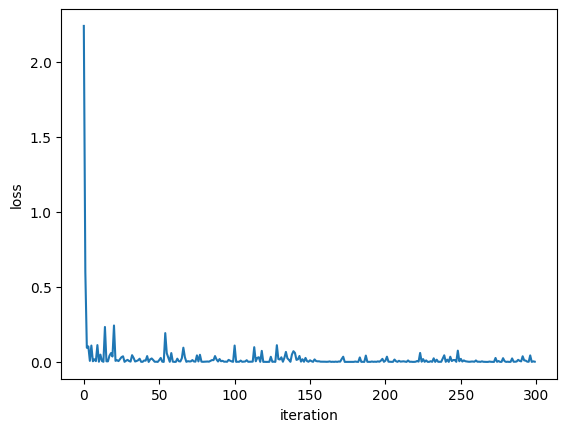

In [19]:
plt.plot(loss_list)
plt.xlabel("iteration")
plt.ylabel("loss")
plt.show()


In [20]:
# Get the first 4 misclassified samples
misclassified_images = []
misclassified_preds = []
misclassified_labels = []

model.eval()  # Ensure model is in eval mode
with torch.no_grad():  # Disable gradient computation
    for x_test, y_test in validation_loader:
        z = model(x_test)
        _, yhat = torch.max(z.data, 1)

        for i in range(len(y_test)):
            if yhat[i] != y_test[i]:
                misclassified_images.append(x_test[i])
                misclassified_preds.append(yhat[i].item())
                misclassified_labels.append(y_test[i].item())
            if len(misclassified_images) >= 4:
                break
        if len(misclassified_images) >= 4:
            break


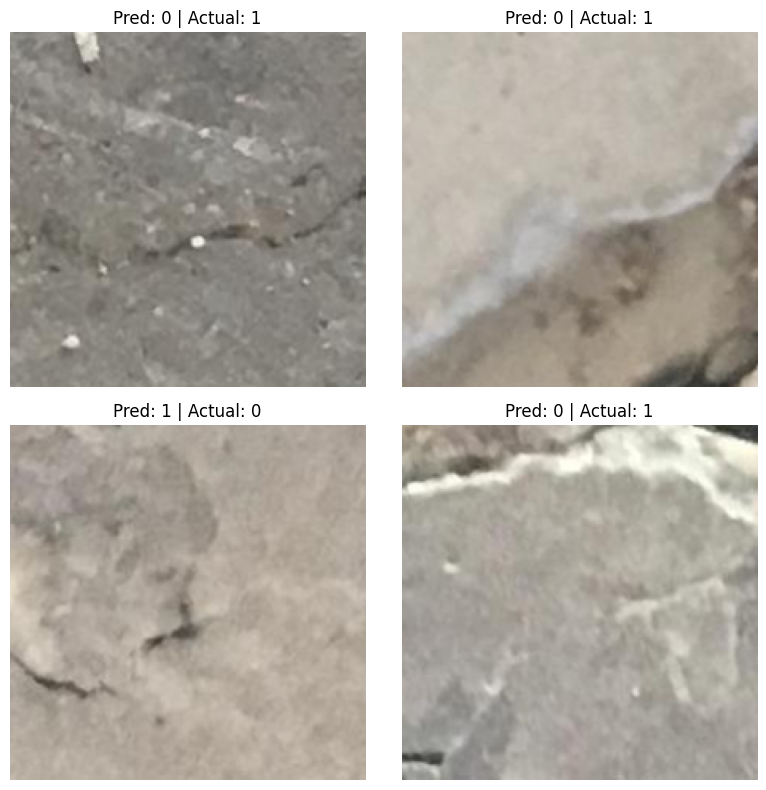

In [ ]:
import matplotlib.pyplot as plt
import torchvision.transforms as transforms

unnormalize = transforms.Normalize(
    mean=[-0.485 / 0.229, -0.456 / 0.224, -0.406 / 0.225],
    std=[1 / 0.229, 1 / 0.224, 1 / 0.225]
)

fig, axes = plt.subplots(2, 2, figsize=(8, 8))
axes = axes.flatten()

for i in range(4):
    image = misclassified_images[i]

    image = unnormalize(image)
    image = image.permute(1, 2, 0)
    image = torch.clamp(image, 0, 1)

    axes[i].imshow(image)
    axes[i].set_title(f"Pred: {misclassified_preds[i]} | Actual: {misclassified_labels[i]}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()


In [23]:
misclassified_samples = []

model.eval()
with torch.no_grad():
    for x_test, y_test in validation_loader:
        z = model(x_test)
        _, yhat = torch.max(z.data, 1)

        for i in range(len(y_test)):
            if yhat[i] != y_test[i]:
                misclassified_samples.append({
                    "index": i,
                    "predicted": yhat[i].item(),
                    "actual": y_test[i].item()
                })
            if len(misclassified_samples) >= 4:
                break
        if len(misclassified_samples) >= 4:
            break


In [24]:
print("First 4 Misclassified Samples:")
for i, sample in enumerate(misclassified_samples):
    print(f"Sample {i+1}: Predicted = {sample['predicted']}, Actual = {sample['actual']}")


First 4 Misclassified Samples:
Sample 1: Predicted = 0, Actual = 1
Sample 2: Predicted = 0, Actual = 1
Sample 3: Predicted = 1, Actual = 0
Sample 4: Predicted = 0, Actual = 1


[tensor([[[0.5193, 0.3481, 0.1083,  ..., 0.4337, 0.4508, 0.4679],
          [0.5022, 0.3823, 0.2282,  ..., 0.4166, 0.4337, 0.4508],
          [0.4508, 0.3994, 0.3309,  ..., 0.4166, 0.4337, 0.4508],
          ...,
          [0.2796, 0.2453, 0.2453,  ..., 0.2111, 0.2111, 0.2111],
          [0.3309, 0.2967, 0.2967,  ..., 0.2282, 0.2282, 0.2282],
          [0.3994, 0.3652, 0.3652,  ..., 0.2453, 0.2453, 0.2453]],
 
         [[0.6429, 0.4678, 0.2227,  ..., 0.5203, 0.5378, 0.5553],
          [0.6254, 0.5028, 0.3452,  ..., 0.5028, 0.5203, 0.5378],
          [0.5728, 0.5203, 0.4503,  ..., 0.5028, 0.5203, 0.5378],
          ...,
          [0.3627, 0.3277, 0.3277,  ..., 0.2927, 0.2927, 0.2927],
          [0.4153, 0.3803, 0.3803,  ..., 0.3102, 0.3102, 0.3102],
          [0.4853, 0.4503, 0.4503,  ..., 0.3277, 0.3277, 0.3277]],
 
         [[0.7751, 0.6008, 0.3568,  ..., 0.6531, 0.6705, 0.6879],
          [0.7576, 0.6356, 0.4788,  ..., 0.6356, 0.6531, 0.6705],
          [0.7054, 0.6531, 0.5834,  ...,